# 3.1-3.2 Show and Partition the data

the length is %d 35


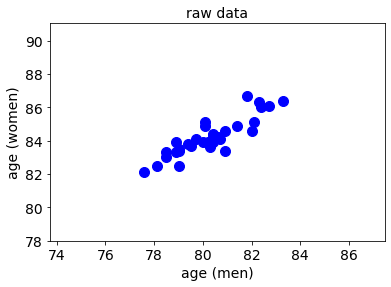

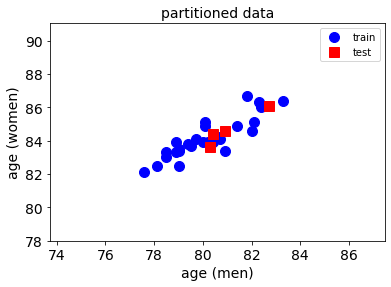

In [5]:
#--
# data0.py
# data exploration using downloaded data
# @author: letsios, sklar
# @created: 12 Jan 2021
#
#--

import sys
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as model_select

DEBUGGING = False
DATA_DIR  = '../data/'
DATA_FILE = 'london-borough-profiles-jan2018.csv'
PLOT_DIR  = '../plots/'


#--
# MAIN
#--

#-get data from a file
try:
# open data file in csv format
    f = open( DATA_DIR + DATA_FILE, encoding='unicode_escape')
# read contents of data file into "rawdata" list
    rawdata0 = csv.reader( f )
# parse data in csv format
    rawdata = [rec for rec in rawdata0]
    print("the length is %d",len(rawdata))
# handle exceptions:
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str( iox ))
    sys.exit()
except Exception as x:
    print('there was an error: ' + str( x ))
    sys.exit()

#-save header and delete from rest of data array
header = rawdata[0]
del rawdata[0]
#-(optionally) print some info about the data set
if DEBUGGING:
    print( 'number of fields = %d' % len( header ) )
    print('fields:')
    i = 0
    for field in header:
        print( 'i=%d field=[%s]' % ( i, field ))
        i = i + 1

#-save variables of interest:
# column 70 = Male life expectancy, (2012-14)
# column 71 = Female life expectancy, (2012-14)
x = []
y = []
index = 0
for rec in rawdata:
    err = 0
    tmp1 = rec[70].strip().replace(',','')
    tmp2 = rec[71].strip().replace(',','')
    try:
        f1 = float( tmp1 )
        f2 = float( tmp2 )
    except ValueError as iox:
        err = err + 1
    if ( err == 0 ):
        x.append( f1 )
        y.append( f2 )
# set number of instances
M = len( x )
# find and scale smallest and largest values of x and y, for plot axis
# limits (so that plots displayed during iterative search have
# consistent axis limits)
xmin = 0.95 * min( x )
xmax = 1.05 * max( x )
ymin = 0.95 * min( y )
ymax = 1.05 * max( y )

#-plot raw data --- always a good idea to do this!
plt.figure()
# plot data points
plt.plot( x, y, "bo", markersize=10 ) # b for blue, o for circle
# set plot axis limits so it all displays nicely
plt.xlim(( xmin, xmax ))
plt.ylim(( ymin, ymax ))
# add plot labels and ticks
plt.xticks( fontsize=14 )
plt.yticks( fontsize=14 )
plt.xlabel( 'age (men)' , fontsize=14 )
plt.ylabel( 'age (women)' , fontsize=14 )
plt.title( 'raw data', fontsize=14 )
# save plot
plt.savefig( PLOT_DIR + 'data0-raw.png' )
plt.show()
plt.close()

#-partition the data
x_train, x_test, y_train, y_test = model_select.train_test_split( x, y, test_size=0.10 )

#-plot partitioned data
plt.figure()
plt.plot( x_train, y_train, 'bo', markersize=10, label='train' )
plt.plot( x_test, y_test, 'rs', markersize=10, label='test' )
plt.legend()
# set plot axis limits so it all displays nicely
plt.xlim(( xmin, xmax ))
plt.ylim(( ymin, ymax ))
# add plot labels and ticks
plt.xticks( fontsize=14 )
plt.yticks( fontsize=14 )
plt.xlabel( 'age (men)' , fontsize=14 )
plt.ylabel( 'age (women)' , fontsize=14 )
plt.title( 'partitioned data', fontsize=14 )
# save plot
plt.savefig( PLOT_DIR + 'data0-partitioned.png' )
plt.show()
plt.close()


# 3.3 Generate a synthetic dataset

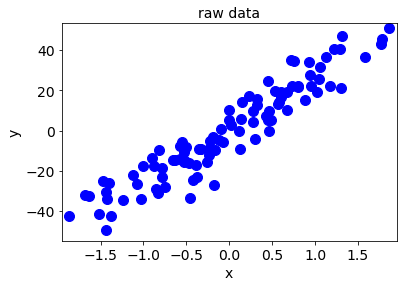

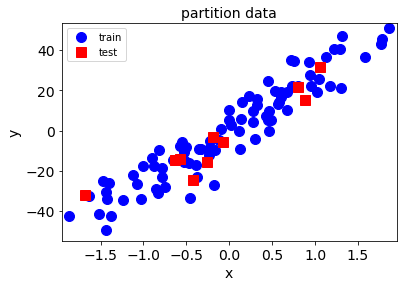

In [166]:
import sys
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as model_select
# import sklearn.datasets as data

from sklearn import datasets
x, y, p = datasets.make_regression(n_samples=100, n_features=1, n_informative = 1, noise = 10, coef = True)

xmin = min(x) * 0.95
xmax = max(x) * 1.05
ymin = min(y) * 0.95
ymax = max(y) * 1.05

plt.figure()
plt.plot(x,y,"bo",markersize = 10 )

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel('x',fontsize = 14)
plt.ylabel('y',fontsize = 14)

plt.title('raw data',fontsize = 14)

plt.show()
plt.close()

#-partition the data
x_train, x_test, y_train, y_test = model_select.train_test_split(x,y,test_size = 0.1)


plt.figure()
plt.plot(x_train,y_train,"bo",markersize = 10,label = "train")
plt.plot(x_test,y_test,"rs",markersize = 10,label = "test")
plt.legend()

plt.xlim((xmin,xmax))
plt.ylim((ymin,ymax))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel("x",fontsize = 14)
plt.ylabel("y",fontsize = 14)

plt.title("partition data", fontsize=14 )
plt.show()
plt.close()


# 4 Linear Regression

## 4.1-4.5 Solving Linear Regression with Gradient Descent (self)

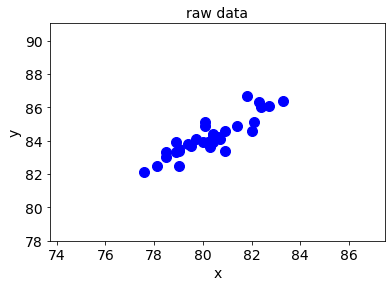

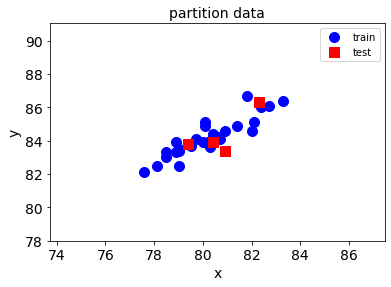

[0.5750890046037753, 0.2801741629323632]
num_iters = 1  prev_error = 3741.690426  curr_error = 1017.928424  r^2 = -786.907634
iteration 1: y = 0.5796347589697526 + 0.6449136041229638x, error=1017.9284242790785 r^2=-786.9076343049493


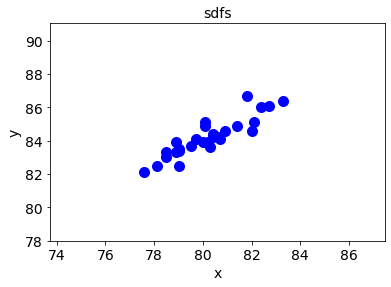

[0.5796347589697526, 0.6449136041229638]
num_iters = 2  prev_error = 1017.928424  curr_error = 277.314088  r^2 = -213.649558
iteration 2: y = 0.5820051234541457 + 0.835072286017262x, error=277.314087544538 r^2=-213.64955832370828


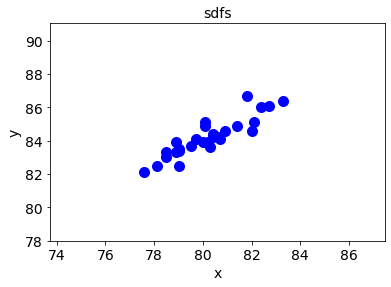

[0.5820051234541457, 0.835072286017262]
num_iters = 3  prev_error = 277.314088  curr_error = 75.868293  r^2 = -57.724372
iteration 3: y = 0.5832413378111314 + 0.9342124373609525x, error=75.86829337492252 r^2=-57.72437209337653


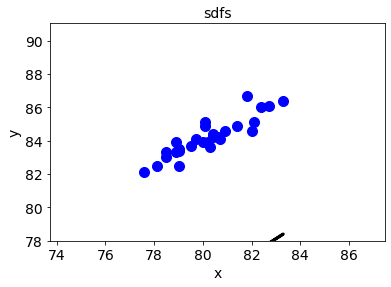

[0.5832413378111314, 0.9342124373609525]
num_iters = 4  prev_error = 75.868293  curr_error = 21.040797  r^2 = -15.286219
iteration 4: y = 0.5838862574662335 + 0.9858996337685754x, error=21.040797226879885 r^2=-15.286218531192066


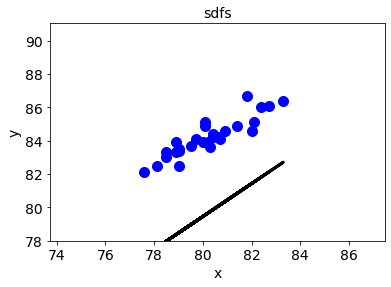

[0.5838862574662335, 0.9858996337685754]
num_iters = 5  prev_error = 21.040797  curr_error = 6.100375  r^2 = -3.721876
iteration 5: y = 0.5842229027438661 + 1.0128470006212438x, error=6.100375176784409 r^2=-3.72187637094125


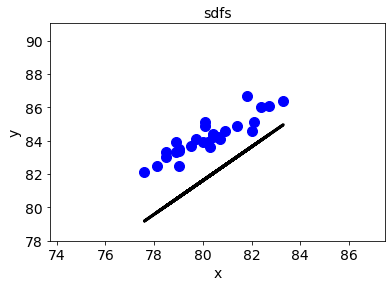

[0.5842229027438661, 1.0128470006212438]
num_iters = 6  prev_error = 6.100375  curr_error = 2.019745  r^2 = -0.563344
iteration 6: y = 0.584398827670877 + 1.0268961366422855x, error=2.0197449331370025 r^2=-0.5633441548647511


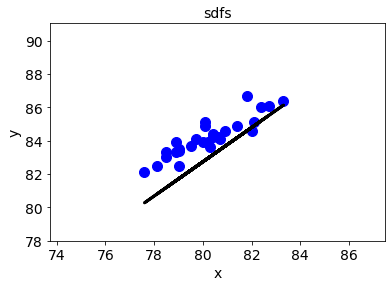

[0.584398827670877, 1.0268961366422855]
num_iters = 7  prev_error = 2.019745  curr_error = 0.900335  r^2 = 0.303113
iteration 7: y = 0.5844909602590038 + 1.0342207170952946x, error=0.900334992174538 r^2=0.30311326725294474


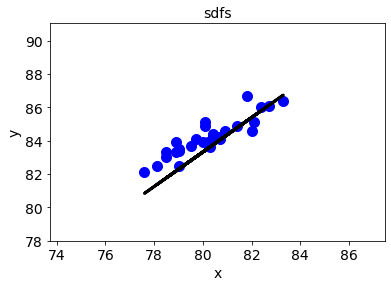

[0.5844909602590038, 1.0342207170952946]
num_iters = 8  prev_error = 0.900335  curr_error = 0.590723  r^2 = 0.542762
[0.5845394073024597, 1.0380394176971959]
num_iters = 9  prev_error = 0.590723  curr_error = 0.503781  r^2 = 0.610058
[0.5845650786740678, 1.0400303107353008]
num_iters = 10  prev_error = 0.590723  curr_error = 0.478697  r^2 = 0.629474
[0.5845788758380337, 1.041068267383071]
num_iters = 11  prev_error = 0.478697  curr_error = 0.471121  r^2 = 0.635338
[0.5845864823259036, 1.0416094059948433]
num_iters = 12  prev_error = 0.478697  curr_error = 0.468667  r^2 = 0.637237
[0.5845908612745764, 1.041891526099824]
num_iters = 13  prev_error = 0.478697  curr_error = 0.467795  r^2 = 0.637913
[0.5845935575299298, 1.0420386056426683]
num_iters = 14  prev_error = 0.478697  curr_error = 0.467450  r^2 = 0.638179
[0.5845953765048985, 1.042115281129649]
num_iters = 15  prev_error = 0.478697  curr_error = 0.467300  r^2 = 0.638295
[0.5845967381054458, 1.042155251118638]
num_iters = 16  prev_

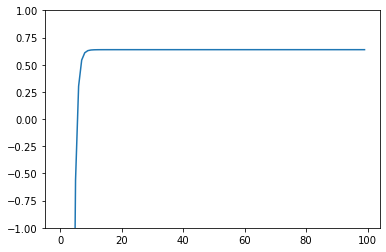

In [22]:
# basic linear regression method applied to an existing data set

import sys
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as model_select

DEBUGGING = False
DATA_DIR  = '../data/'
DATA_FILE = 'london-borough-profiles-jan2018.csv'
PLOT_DIR  = '../plots/'
LEARNING_RATE = 0.0001
ERROR_MARGIN  = 0.1

#--
# compute_error()
# This function computes the sum of squared errors for the model.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameters values (of size 2)
#  y = list of target values
# output:
#  error (scalar)
#--
# Least Squares Linears 
def compute_error( M, x, w, y ):
    error = 0
    y_hat = [0 for i in range( M )]
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        error = error + math.pow(( y[j] - y_hat[j] ), 2 )
    error = error / M
    return( error )

#--
# compute_r2()
# This function computes R^2 for the model.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameters values (of size 2)
#  y = list of target values
# output:
#  r2 (scalar)
#--
def compute_r2( M, x, w, y ):
    u = 0
    v = 0
    y_hat = [0 for i in range( M )]
    y_mean = np.mean( y )
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        u = u + math.pow(( y[j] - y_hat[j] ), 2 )
        v = v + math.pow(( y[j] - y_mean ), 2 )
    r2 = 1.0 - ( u / v )
    return( r2 )

#--
# gradient_descent_2()
# this function solves linear regression with gradient descent for 2
# parameters.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameter values (of size 2)
#  y = list of target values
#  alpha = learning rate
# output:
#  w = updated list of parameter values
#---
def gradient_descent_2( M, x, w, y, alpha ):
    for j in range( M ):
        # compute prediction for this instance
        y_hat = w[0] + w[1] * x[j]
        # compute prediction error for this instance
        error = y[j] - y_hat
        # adjust by partial error (for this instance)
        w[0] = w[0] + alpha * error * 1    * ( 1.0 / M )
        w[1] = w[1] + alpha * error * x[j] * ( 1.0 / M )
    return w


#MAIN
try:
    f= open(DATA_DIR + DATA_FILE, encoding='unicode_escape')
    rawdata0 = csv.reader(f)
    rawdata = [rec for rec in rawdata0]
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str( iox ))
    sys.exit()
except Exception as x:
    print('there was an error: ' + str( x ))
    sys.exit()
    
header = rawdata[0]
del rawdata[0]

if DEBUGGING:
    print( 'number of fields = %d' % len( header ) )
    print('fields:')
    i = 0
    for field in header:
        print( 'i=%d field=[%s]' % ( i, field ))
        i = i + 1
    print( 'number of records = %d' % len( rawdata ))
    
#-save variables of interest:
x=[]
y=[]
for rec in rawdata:
    err = 0 
    tmp1 = rec[70].strip()
    tmp2 = rec[71].strip()
    try:
        x1 = float(tmp1)
        y1 = float(tmp2)
    except ValueError as iox:
        err = err + 1
    if(err == 0):
        x.append(x1)
        y.append(y1)
# set number of instances       
M = len(rawdata)

xmin = min(x)*0.95
xmax = max(x)*1.05
ymin = min(y)*0.95
ymax = max(y)*1.05

plt.figure()
plt.plot(x,y,"bo",markersize = 10)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel("x",fontsize = 14)
plt.ylabel('y',fontsize = 14)

plt.title("raw data", fontsize = 14)

plt.show()
plt.close()

#partition the data
x_train, x_test, y_train, y_test = model_select.train_test_split(x,y,test_size= 0.1)
M_train = len(x_train)
M_test = len(x_test)

plt.figure()
plt.plot(x_train,y_train,"bo",markersize = 10,label = "train")
plt.plot(x_test,y_test,"rs",markersize = 10,label = "test")
plt.legend()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel("x",fontsize = 14)
plt.ylabel("y",fontsize = 14)

plt.title("partition data", fontsize = 14)
plt.show()
plt.close()

#-run gradient descent to compute the regression equation
alpha   = LEARNING_RATE
epsilon = ERROR_MARGIN
# initialise predictions
y_hat = [0 for i in range( M_train )]
# initialise weights
w = [random.random() for i in range( 2 )]
# compute initial error
prev_error = compute_error( M_train, x_train, w, y_train )

r2_value = [0 for i in range( 100 )]
for num_iters in range( 100 ):
    # adjust weights using gradient descent
    print(w)
    w = gradient_descent_2( M_train, x_train, w, y_train, alpha )
    # compute error
    curr_error = compute_error( M_train, x_train, w, y_train )
    r2 = compute_r2( M_train, x_train, w, y_train )
    r2_value[num_iters] = r2
    num_iters = num_iters + 1
    print( 'num_iters = %d  prev_error = %f  curr_error = %f  r^2 = %f' % ( num_iters, prev_error, curr_error, r2 ))
    # plot results, when error difference is > 1
    if ( math.fabs( prev_error - curr_error ) > 1 ):
        for j in range( M_train ):
            y_hat[j] = w[0] + w[1] * x_train[j]
        plt.figure()
        
        plt.plot(x_train,y_train,"bo",markersize = 10)
        plt.plot(x_train,y_hat,"k",linewidth = 3)
        # set plot axis limits so it all displays nicely
        plt.xlim(( xmin, xmax ))
        plt.ylim(( ymin, ymax ))
        # add plot labels and ticks
        plt.xticks( fontsize=14 )
        plt.yticks( fontsize=14 )
        
        plt.xlabel("x",fontsize = 14)
        plt.ylabel("y",fontsize = 14)
        
        plt.title("sdfs",fontsize = 14)
        print( 'iteration ' + str( num_iters ) + ': y = ' + str( w[0] ) + ' + ' + str( w[1] ) + 'x, error=' + str( curr_error) + ' r^2=' + str( r2 ))
        plt.show()
        plt.close()
    if ( prev_error - curr_error < epsilon ):
        converged = True
    else:
        prev_error = curr_error
        

r2_x = [i for i in range(100)]
ymin = -1
ymax = 1
plt.figure()
plt.plot(r2_x,r2_value)
plt.ylim((ymin,ymax))

plt.show()
plt.close()


### end with the convergence

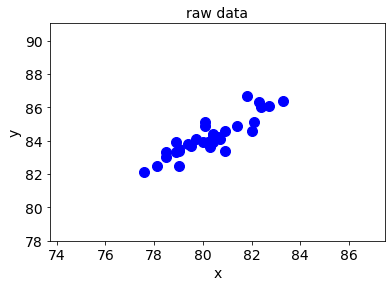

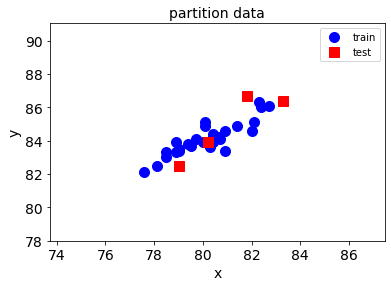

[0.9554240598374727, 0.11087719348893099]
num_iters = 1  prev_error = 5520.438961  curr_error = 0.498238  r^2 = 0.489113
iteration 1: y = 0.9669986425923837 + 1.038731960080341x, error=0.49823820119511797 r^2=0.4891134467662761


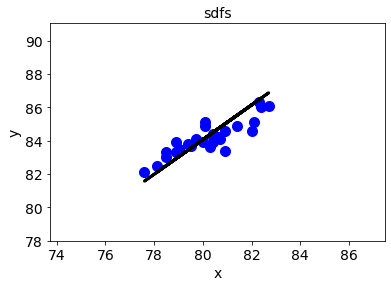

[0.9669986425923837, 1.038731960080341]
num_iters = 2  prev_error = 0.498238  curr_error = 0.512006  r^2 = 0.474996


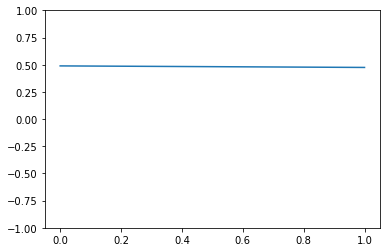

In [74]:
# basic linear regression method applied to an existing data set

import sys
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as model_select

DEBUGGING = False
DATA_DIR  = '../data/'
DATA_FILE = 'london-borough-profiles-jan2018.csv'
PLOT_DIR  = '../plots/'
LEARNING_RATE = 0.001
ERROR_MARGIN  = 0.1

#--
# compute_error()
# This function computes the sum of squared errors for the model.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameters values (of size 2)
#  y = list of target values
# output:
#  error (scalar)
#--
# Least Squares Linears 
def compute_error( M, x, w, y ):
    error = 0
    y_hat = [0 for i in range( M )]
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        error = error + math.pow(( y[j] - y_hat[j] ), 2 )
    error = error / M
    return( error )

#--
# compute_r2()
# This function computes R^2 for the model.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameters values (of size 2)
#  y = list of target values
# output:
#  r2 (scalar)
#--
def compute_r2( M, x, w, y ):
    u = 0
    v = 0
    y_hat = [0 for i in range( M )]
    y_mean = np.mean( y )
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        u = u + math.pow(( y[j] - y_hat[j] ), 2 )
        v = v + math.pow(( y[j] - y_mean ), 2 )
    r2 = 1.0 - ( u / v )
    return( r2 )

#--
# gradient_descent_2()
# this function solves linear regression with gradient descent for 2
# parameters.
# inputs:
#  M = number of instances
#  x = list of variable values for M instances
#  w = list of parameter values (of size 2)
#  y = list of target values
#  alpha = learning rate
# output:
#  w = updated list of parameter values
#---
def gradient_descent_2( M, x, w, y, alpha ):
    for j in range( M ):
        # compute prediction for this instance
        y_hat = w[0] + w[1] * x[j]
        # compute prediction error for this instance
        error = y[j] - y_hat
        # adjust by partial error (for this instance)
        w[0] = w[0] + alpha * error * 1    * ( 1.0 / M )
        w[1] = w[1] + alpha * error * x[j] * ( 1.0 / M )
    return w


#MAIN
try:
    f= open(DATA_DIR + DATA_FILE, encoding='unicode_escape')
    rawdata0 = csv.reader(f)
    rawdata = [rec for rec in rawdata0]
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str( iox ))
    sys.exit()
except Exception as x:
    print('there was an error: ' + str( x ))
    sys.exit()
    
header = rawdata[0]
del rawdata[0]

if DEBUGGING:
    print( 'number of fields = %d' % len( header ) )
    print('fields:')
    i = 0
    for field in header:
        print( 'i=%d field=[%s]' % ( i, field ))
        i = i + 1
    print( 'number of records = %d' % len( rawdata ))
    
#-save variables of interest:
x=[]
y=[]
for rec in rawdata:
    err = 0 
    tmp1 = rec[70].strip()
    tmp2 = rec[71].strip()
    try:
        x1 = float(tmp1)
        y1 = float(tmp2)
    except ValueError as iox:
        err = err + 1
    if(err == 0):
        x.append(x1)
        y.append(y1)
# set number of instances       
M = len(rawdata)

xmin = min(x)*0.95
xmax = max(x)*1.05
ymin = min(y)*0.95
ymax = max(y)*1.05

plt.figure()
plt.plot(x,y,"bo",markersize = 10)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel("x",fontsize = 14)
plt.ylabel('y',fontsize = 14)

plt.title("raw data", fontsize = 14)

plt.show()
plt.close()

#partition the data
x_train, x_test, y_train, y_test = model_select.train_test_split(x,y,test_size= 0.1)
M_train = len(x_train)
M_test = len(x_test)

plt.figure()
plt.plot(x_train,y_train,"bo",markersize = 10,label = "train")
plt.plot(x_test,y_test,"rs",markersize = 10,label = "test")
plt.legend()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel("x",fontsize = 14)
plt.ylabel("y",fontsize = 14)

plt.title("partition data", fontsize = 14)
plt.show()
plt.close()

#-run gradient descent to compute the regression equation
alpha   = LEARNING_RATE
epsilon = ERROR_MARGIN
# initialise predictions
y_hat = [0 for i in range( M_train )]
# initialise weights
w = [random.random() for i in range( 2 )]
# compute initial error
prev_error = compute_error( M_train, x_train, w, y_train )
converged = False
num_iters = 0
r2_value1= []
while (not converged):
    # adjust weights using gradient descent
    print(w)
    w = gradient_descent_2( M_train, x_train, w, y_train, alpha )
    # compute error
    curr_error = compute_error( M_train, x_train, w, y_train )
    r2 = compute_r2( M_train, x_train, w, y_train )
    r2_value1.append(r2)
    num_iters = num_iters + 1
    print( 'num_iters = %d  prev_error = %f  curr_error = %f  r^2 = %f' % ( num_iters, prev_error, curr_error, r2 ))
    # plot results, when error difference is > 1
    if ( math.fabs( prev_error - curr_error ) > 1 ):
        for j in range( M_train ):
            y_hat[j] = w[0] + w[1] * x_train[j]
        plt.figure()
        
        plt.plot(x_train,y_train,"bo",markersize = 10)
        plt.plot(x_train,y_hat,"k",linewidth = 3)
        # set plot axis limits so it all displays nicely
        plt.xlim(( xmin, xmax ))
        plt.ylim(( ymin, ymax ))
        # add plot labels and ticks
        plt.xticks( fontsize=14 )
        plt.yticks( fontsize=14 )
        
        plt.xlabel("x",fontsize = 14)
        plt.ylabel("y",fontsize = 14)
        
        plt.title("sdfs",fontsize = 14)
        print( 'iteration ' + str( num_iters ) + ': y = ' + str( w[0] ) + ' + ' + str( w[1] ) + 'x, error=' + str( curr_error) + ' r^2=' + str( r2 ))
        plt.show()
        plt.close()
    if ( prev_error - curr_error < epsilon ):
        converged = True
    else:
        prev_error = curr_error
        
        

r2_x = [i for i in range(num_iters)]

plt.figure()
plt.plot(r2_x,r2_value1)

plt.show()
plt.close()


### final result

[0.5846706708659178, 1.0421978847744746]


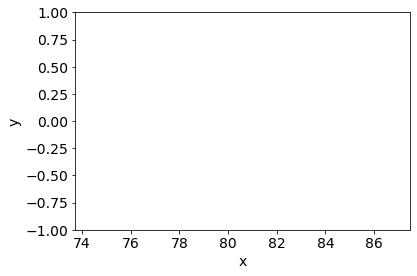

In [23]:
print(w)

for j in range( M_train ):
    y_hat[j] = w[0] + w[1] * x_train[j]
plt.figure()
plt.plot(x_train,y_train,"bo",markersize = 10)
plt.plot(x_train,y_hat,"k",linewidth = 3)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.xticks( fontsize = 14)
plt.yticks( fontsize = 14)

plt.xlabel("x",fontsize = 14)
plt.ylabel("y",fontsize = 14)

plt.show()
plt.close()


### model on the test

evaluation:  test_error = 0.673175  test_r^2 = 0.483167


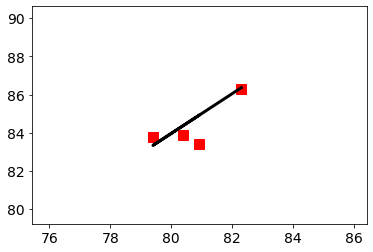

In [24]:
test_error = compute_error( M_test, x_test, w, y_test )
test_r2 = compute_r2( M_test, x_test, w, y_test )
print( 'evaluation:  test_error = %f  test_r^2 = %f' % ( test_error, test_r2 ))

#-plot and save regression line from testing
plt.figure()
plt.plot( x_test, y_test, 'rs', markersize=10 )
#plt.hold( True )
y_hat = [0 for i in range( M_test )]
for j in range( M_test ):
    y_hat[j] = w[0] + w[1] * x_test[j]
plt.plot( x_test, y_hat, 'k', linewidth=3 )
# set plot axis limits so it all displays nicely
xmin = min(x_test) * 0.95
xmax = max(x_test) * 1.05
ymin = min(y_test) * 0.95
ymax = max(y_test) * 1.05
plt.xlim(( xmin, xmax ))
plt.ylim(( ymin, ymax ))
# add plot labels and ticks
plt.xticks( fontsize=14 )
plt.yticks( fontsize=14 )
#plt.title( 'regression equation: y = ' + str( w[0] ) + ' + ' + str( w[1] ) + 'x, r^2=' + str( r2 ))
# save plot
#plt.savefig( PLOT_DIR + 'linreg0-test.png' )
plt.show()
plt.close()

## 4.6 same with the syntheic data set

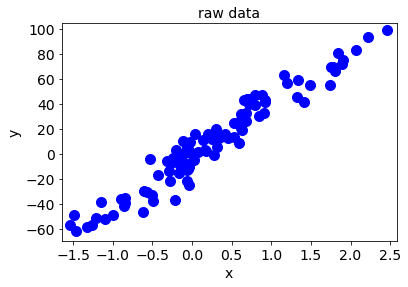

num_iters = 0  prev_error = 1463.087703  curr_error = 1462.840956  r^2 = -0.016252
[array([0.18200329]), array([0.96049964])]
<class 'list'>


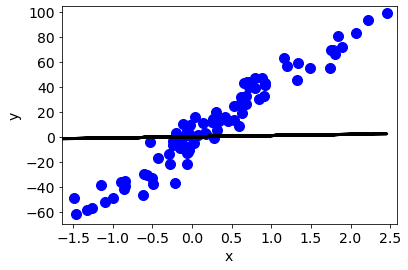

num_iters = 1000  prev_error = 1238.601329  curr_error = 1238.397671  r^2 = 0.139672
[array([1.01984055]), array([4.20256751])]
<class 'list'>


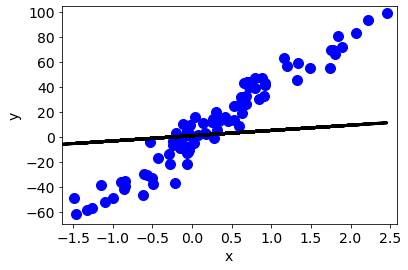

num_iters = 2000  prev_error = 1053.083008  curr_error = 1052.914475  r^2 = 0.268529
[array([1.70580874]), array([7.16840616])]
<class 'list'>


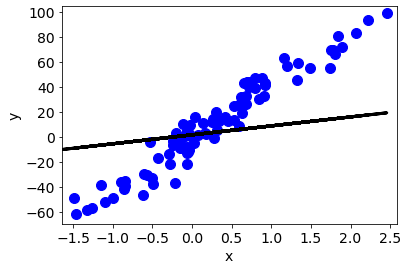

num_iters = 3000  prev_error = 899.363238  curr_error = 899.223400  r^2 = 0.375300
[array([2.26048449]), array([9.88334727])]
<class 'list'>


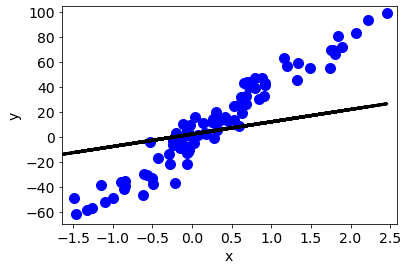

num_iters = 4000  prev_error = 771.651693  curr_error = 771.535354  r^2 = 0.464006
[array([2.70192652]), array([12.37025104])]
<class 'list'>


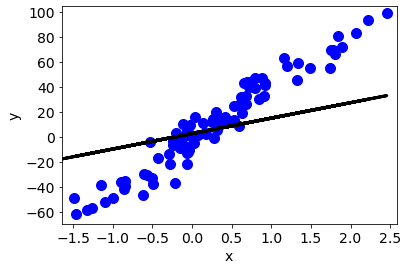

num_iters = 5000  prev_error = 665.263501  curr_error = 665.166453  r^2 = 0.537902
[array([3.04596965]), array([14.64975871])]
<class 'list'>


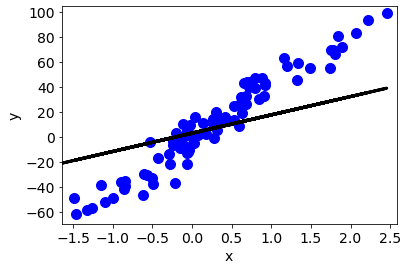

num_iters = 6000  prev_error = 576.400980  curr_error = 576.319807  r^2 = 0.599624
[array([3.3064854]), array([16.74051847])]
<class 'list'>


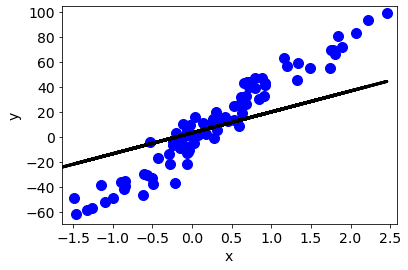

num_iters = 7000  prev_error = 501.979433  curr_error = 501.911359  r^2 = 0.651317
[array([3.49561277]), array([18.65938761])]
<class 'list'>


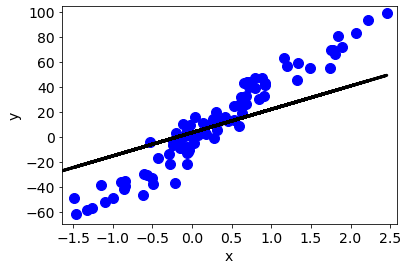

num_iters = 8000  prev_error = 439.487996  curr_error = 439.430758  r^2 = 0.694723
[array([3.62396263]), array([20.42161341])]
<class 'list'>


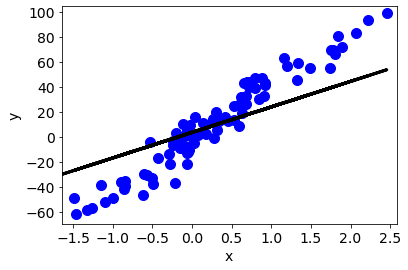

num_iters = 9000  prev_error = 386.878373  curr_error = 386.830122  r^2 = 0.731265
[array([3.70079861]), array([22.04099518])]
<class 'list'>


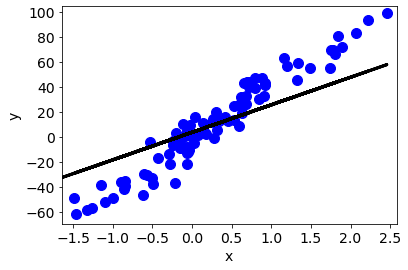

In [10]:
import sys
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as model_select
import sklearn.datasets as data

DEBUGGING = False
PLOT_DIR  = '../plots/'
LEARNING_RATE = 0.0001
ERROR_MARGIN  = 0.1

def compute_error( M, x, w, y ):
    error = 0
    y_hat = [0 for i in range( M )]
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        error = error + math.pow(( y[j] - y_hat[j] ), 2 )
    error = error / M
    return( error )

def compute_r2( M, x, w, y ):
    u = 0
    v = 0
    y_hat = [0 for i in range( M )]
    y_mean = np.mean( y )
    for j in range( M ):
        y_hat[j] = w[0] + w[1] * x[j]
        u = u + math.pow(( y[j] - y_hat[j] ), 2 )
        v = v + math.pow(( y[j] - y_mean ), 2 )
    r2 = 1.0 - ( u / v )
    return( r2 )


def gradient_descent_2( M, x, w, y, alpha ):
    for j in range( M ):
        # compute prediction for this instance
        y_hat = w[0] + w[1] * x[j]
        # compute prediction error for this instance
        error = y[j] - y_hat
        # adjust by partial error (for this instance)
        w[0] = w[0] + alpha * error * 1    * ( 1.0 / M )
        w[1] = w[1] + alpha * error * x[j] * ( 1.0 / M )
    return w

#--
# MAIN
#--

#-generate synthetic data for regression
num_features = 1
x, y, p = data.make_regression( n_samples=100, n_features=num_features, n_informative=1, noise=10, coef=True )

M = len(x)

xmin = min(x) * 0.95
xmax = max(x) * 1.05
ymin = min(y) * 0.95
ymax = max(y) * 1.05

plt.figure()
# plot data points
plt.plot( x, y, 'bo', markersize=10 )
# set plot axis limits so it all displays nicely
plt.xlim(( xmin, xmax ))
plt.ylim(( ymin, ymax ))
# add plot labels and ticks
plt.xticks( fontsize=14 )
plt.yticks( fontsize=14 )
plt.xlabel( 'x' , fontsize=14 )
plt.ylabel( 'y' , fontsize=14 )
plt.title( 'raw data', fontsize=14 )
# save plot

plt.show()
plt.close()



x_train,x_test,y_train,y_test = model_select.train_test_split(x,y,test_size=0.10)
M_train = len(x_train)
M_test = len(x_test)


w = [random.random() for i in range( 2 )]

y_hat = [0 for i in range(M_train)]

prev_error = compute_error(M_train,x_train,w,y_train)

alpha   = LEARNING_RATE
epsilon = ERROR_MARGIN

for i in range(10000):
    w = gradient_descent_2(M_train, x_train, w, y_train, alpha)
    cur_err = compute_error(M_train,x_train,w,y_train)
    r2 = compute_r2(M_train, x_train, w, y_train)
    if(i%1000 == 0):
        print( 'num_iters = %d  prev_error = %f  curr_error = %f  r^2 = %f' % ( i, prev_error, cur_err, r2 ))
        print(w)
        print(type(w))

        for j in range(M_train):
            y_hat[j] = w[0] + w[1] * x_train[j]
        plt.figure()
        plt.plot(x_train,y_train,"bo",markersize = 10)
        plt.plot(x_train,y_hat,"k",linewidth = 3)
        
        plt.xlim(xmin,xmax)
        plt.ylim(ymin,ymax)
        
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        
        plt.xlabel("x", fontsize = 14)
        plt.ylabel("y", fontsize = 14)
        
        plt.show()
        plt.close()
    if(prev_error - cur_err < epsilon):
        coverage = True
    else:
        prev_error = cur_err 
        

### final result

[array([-0.22559269]), array([23.42408414])]
True


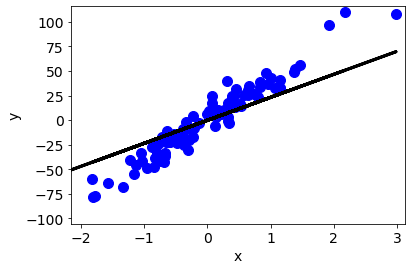

In [176]:
print(w)
print(coverage)

for j in range(M_train):
    y_hat[j] = w[0] + w[1] * x_train[j]
plt.figure()
plt.plot(x_train,y_train,"bo",markersize = 10)
plt.plot(x_train,y_hat,"k",linewidth = 3)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)

plt.show()
plt.close()



### model on the test

evaluation:  test_error = 202.096499  test_r^2 = 0.729934


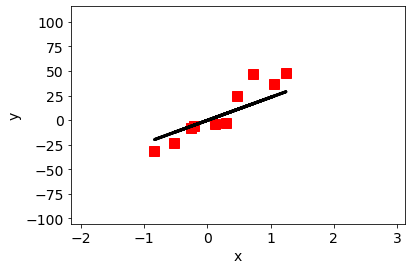

In [177]:
test_error = compute_error( M_test, x_test, w, y_test )
test_r2 = compute_r2( M_test, x_test, w, y_test )
print( 'evaluation:  test_error = %f  test_r^2 = %f' % ( test_error, test_r2 ))
y_hat = [0 for i in range( M_test )]
for j in range(M_test):
    y_hat[j] = w[0] + w[1] * x_test[j]
plt.figure()
plt.plot(x_test,y_test,"rs",markersize = 10)
plt.plot(x_test,y_hat,"k",linewidth = 3)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)

plt.show()
plt.close()

## Using the Linear Regression package in scikit-learn

[[77.6], [82.1], [80.4], [80.1], [81.4], [81.8], [80.3], [80.6], [80.7], [79.0], [78.5], [79.7], [80.1], [82.7], [80.2], [80.4], [80.0], [79.0], [83.3], [82.0], [78.9], [79.0], [80.4], [78.5], [80.9], [82.4], [78.9], [80.9], [78.1], [79.4], [79.5], [82.3]]
[82.1, 85.1, 84.4, 85.1, 84.9, 86.7, 83.6, 84.2, 84.1, 82.5, 83.3, 84.1, 84.9, 86.1, 83.9, 83.9, 83.9, 83.5, 86.4, 84.6, 83.3, 83.4, 84.2, 83.0, 84.6, 86.0, 83.9, 83.4, 82.5, 83.8, 83.7, 86.3]
scikit regression equation: y = 26.823328743876246 + 0.7147833883000867x
scikit r2 = 0.7963922916080034
scikit error = 0.2172239738907096


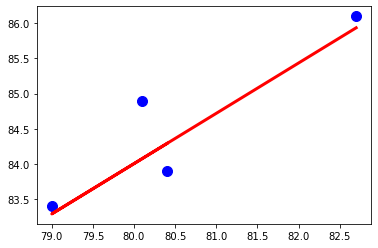

In [13]:
import sys
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics


DATA_DIR  = '../data/'
DATA_FILE = 'london-borough-profiles-jan2018.csv'
PLOT_DIR  = '../plots/'

try:
    f = open( DATA_DIR + DATA_FILE, encoding='unicode_escape')
    rawdata0 = csv.reader(f)
    rawdata = [rec for rec in rawdata0]
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str( iox ))
    sys.exit()
except Exception as x:
    print('there was an error: ' + str( x ))
    sys.exit()

header = rawdata[0]
del rawdata[0]

x= []
y= []

for row in rawdata:
    x1 = row[70].strip().replace(',','')
    y1 = row[71].strip().replace(',','')
    error = 0
    try:
        fx = float(x1)
        fy = float(y1)
    except ValueError as iox:
        error = error +1
    if(error == 0):
        x.append([fx])
        y.append(fy)
M = len(x)
print(x)
print(y)

x_train,x_test,y_train,y_test = model_selection.train_test_split( x, y, test_size=0.10 )
lr = linear_model.LinearRegression()
lr.fit( x_train, y_train )
y_hat = lr.predict( x_test )

print('scikit regression equation: y = ' + str(lr.intercept_) + ' + ' + str(lr.coef_[0]) + 'x')
print('scikit r2 = ' + str(metrics.r2_score( y_test, y_hat )))
print('scikit error = ' + str(metrics.mean_squared_error( y_test, y_hat )))

plt.figure()
plt.plot(x_test,y_test,"bo",markersize = 10)
plt.plot(x_test,y_hat,"r",linewidth = 3)
plt.show()
plt.close()

        
        

### scikit-learn Linear Regression on synthetic data set

[[-1.85838484e-01]
 [-8.71672267e-01]
 [-1.34756933e-02]
 [ 1.68451551e+00]
 [ 1.54966830e+00]
 [-4.20969092e-01]
 [ 7.94204747e-02]
 [ 8.44579335e-01]
 [-4.90293782e-01]
 [ 2.24587418e-01]
 [ 2.28727080e-01]
 [-7.11752438e-01]
 [-1.55470711e+00]
 [ 2.02309705e-01]
 [-1.02854087e-02]
 [ 1.92033533e+00]
 [-1.05367813e+00]
 [ 3.04854346e-01]
 [ 1.87425900e+00]
 [ 1.34831013e+00]
 [-1.27732213e+00]
 [-1.07689173e+00]
 [ 1.60294002e+00]
 [-1.68364668e+00]
 [ 6.86369223e-01]
 [-1.67852181e+00]
 [ 4.41900418e-01]
 [ 7.78815368e-01]
 [ 1.08145611e+00]
 [-6.99909562e-01]
 [-8.52506814e-01]
 [ 1.62034495e+00]
 [ 6.52301452e-01]
 [-9.64840029e-01]
 [ 3.20912565e-01]
 [ 1.46851148e+00]
 [ 4.02115668e-01]
 [-1.10616017e+00]
 [ 1.95451202e+00]
 [ 7.77600615e-01]
 [ 1.68538803e-01]
 [ 4.73216837e-01]
 [-3.26122244e-01]
 [-6.92242247e-01]
 [ 1.14315337e+00]
 [ 1.53600448e-01]
 [-1.19763262e+00]
 [-1.26011691e+00]
 [ 1.61795794e-02]
 [-1.22643190e+00]
 [-6.01970989e-01]
 [-1.05431580e+00]
 [ 1.3599254

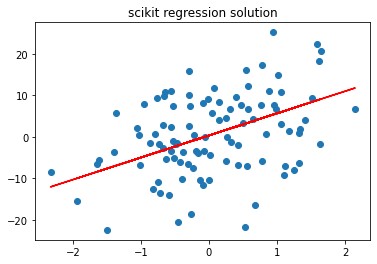

In [30]:
#--
# linreg3.py
# scikit-learn linear regression method applied to a synthetic data
# set, where the data is split into training and test sets
# @author: letsios, sklar
# @created: 12 Jan 2021
#
#--

import sys
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics


#--
# MAIN
#--

#-generate synthetic data set
x, y, p = datasets.make_regression( n_samples=1000, n_features=1, n_informative=1, noise=10, coef=True )
print(x)
print(y)
#-split data into training and test sets
x_train, x_test, y_train, y_test = model_selection.train_test_split( x, y, test_size=0.10 )

#-use scikit-learn's linear regression model, for comparison
lr = linear_model.LinearRegression()
lr.fit( x_train, y_train )
y_hat = lr.predict( x_test )
print('scikit regression equation: y = ' + str(lr.intercept_) + ' + ' + str(lr.coef_[0]) + 'x')
print('scikit r2 = ' + str(metrics.r2_score( y_test, y_hat )))
print('scikit error = ' + str(metrics.mean_squared_error( y_test, y_hat )))

#-plot scikit-learn results
plt.figure()
plt.scatter( x_test, y_test )
#plt.hold( True )
plt.plot( x_test, y_hat, 'r' )
plt.title( 'scikit regression solution' )
plt.savefig( PLOT_DIR + 'linreg3-scikit-final.png' )
plt.show()
plt.close()


# Linear Classification with a Perceptron

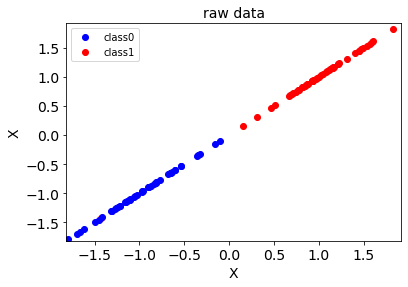

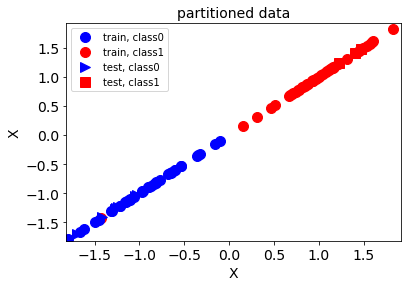

perceptron weights:
w0 = [0.], w1 = [[1.39207225]]
training accuracy =  0.9888888888888889
--------
(-2.0985834971185025, 2.0137847357583794)
--------
--------
[[1.39207225]]
1.3920722535403836
--------


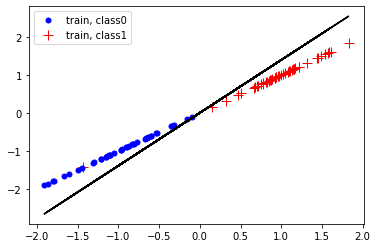

--------
(-2.0985834971185025, 2.0137847357583794)
--------
--------
[[1.39207225]]
1.3920722535403836
--------


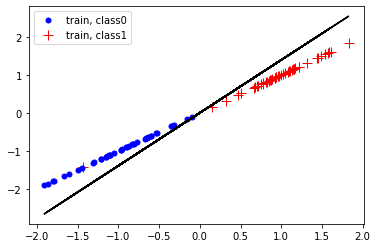

test accuracy = 1.0


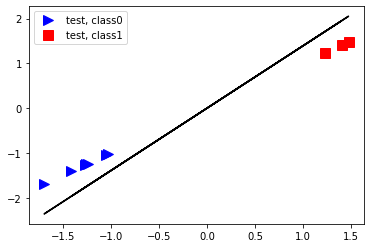

In [72]:
import sys
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as model_select
import sklearn.datasets as data
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics

DEBUGGING = True
PLOT_DIR  = '../plots/'
LEARNING_RATE = 0.0001

num_features = 1
X, y = data.make_classification( n_samples=100, n_features=num_features, 
                                n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1 )

plt.figure()
M = len(X)

Xmin = 0.95 * min(X)
Xmax = 1.05 * max(X)
for i in range (M):
    if(y[i] == 0):
        h0, = plt.plot(X[i],X[i],"bo")
    else:
        h1, = plt.plot(X[i],X[i],"ro")
plt.legend((h0,h1),("class0","class1"), loc='best')

plt.xlim((Xmin,Xmax))
plt.ylim((Xmin,Xmax))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel("X", fontsize = 14)
plt.ylabel("X", fontsize = 14)
plt.title( 'raw data', fontsize=14 )
plt.show()
plt.close()


#partition the data 
X_train, X_test, y_train,y_test = model_select.train_test_split(X,y, test_size= 0.10)
M_train = len(X_train)
M_test = len(X_test)

plt.figure()
# plot data points
for j in range( len( X_train )):
    if ( y_train[j] == 0 ):
        h0train, = plt.plot( X_train[j], X_train[j], 'bo', markersize=10 )
    else:
        h1train, = plt.plot( X_train[j], X_train[j], 'ro', markersize=10 )
for j in range( len( X_test )):
    if ( y_test[j] == 0 ):
        h0test, = plt.plot( X_test[j], X_test[j], 'b>', markersize=10 )
    else:
        h1test, = plt.plot( X_test[j], X_test[j], 'rs', markersize=10 )
plt.legend(( h0train, h1train, h0test, h1test ), ( 'train, class0', 'train, class1', 'test, class0', 'test, class1' ), loc='upper left' )
# set plot axis limits so it all displays nicely
plt.xlim(( Xmin, Xmax ))
plt.ylim(( Xmin, Xmax ))
# add plot labels and ticks
plt.xticks( fontsize=14 )
plt.yticks( fontsize=14 )
plt.xlabel( 'X' , fontsize=14 )
plt.ylabel( 'X' , fontsize=14 )
plt.title( 'partitioned data', fontsize=14 )
# save plot
plt.show()
plt.close()

#-run prediction with model on training data
per = linear_model.Perceptron() # initialise model
per.fit( X_train, y_train ) # fit model to data
print('perceptron weights:')
print('w0 = {}, w1 = {}'.format(per.intercept_, per.coef_))

#-run prediction with model on training data
y_hat = per.predict( X_train ) 
print('training accuracy = ', ( metrics.accuracy_score( y_train, y_hat, normalize=True )))
# plot results 
plt.figure()
# plot raw data points
for j in range( M_train ):
    if ( y_train[j] == 0 ):
        h0train, = plt.plot( X_train[j], X_train[j], 'b.', markersize=10 )
    else:
        h1train, = plt.plot( X_train[j], X_train[j], 'r+', markersize=10 )
plt.legend(( h0train, h1train ), ( 'train, class0', 'train, class1' ), loc='upper left' )
# plot boundary
[xmin,xmax] = plt.xlim()
print("--------")
print(plt.xlim())
print("--------")
xx = []
yy = []
for j in range( M_train ):
    xx.append( X_train[j] )
    y_hat = per.intercept_ + X_train[j] * per.coef_[0,0]
    yy.append( y_hat )
plt.plot( xx, yy, 'k-' )

print("--------")
print(per.coef_)
print(per.coef_[0,0])
print("--------")
plt.show()
plt.close()





#-run prediction with model on test data
y_hat = per.predict( X_test ) 
print('test accuracy =', ( metrics.accuracy_score( y_test, y_hat, normalize=True )))
# plot results
plt.figure()
# plot raw data points
for j in range( M_test ):
    if ( y_test[j] == 0 ):
        h0test, = plt.plot( X_test[j], X_test[j], 'b>', markersize=10 )
    else:
        h1test, = plt.plot( X_test[j], X_test[j], 'rs', markersize=10 )
plt.legend(( h0test, h1test ), ( 'test, class0', 'test, class1' ), loc='upper left' )
#plt.title( 'decision boundary' )
# plot boundary
[xmin,xmax] = plt.xlim()
xx = []
yy = []
for j in range( M_test ):
    xx.append( X_test[j] )
    y_hat = per.intercept_ + X_test[j] * per.coef_[0,0]
    yy.append( y_hat )
plt.plot( xx, yy, 'k' )
# save plot

plt.show()
plt.close()


number of features = 1


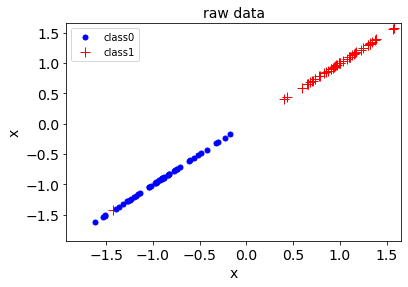

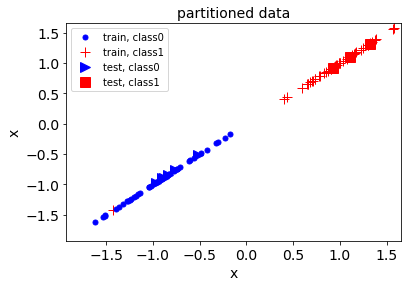

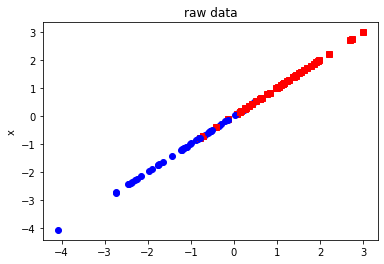

perceptron weights:
w0 = [0.], w1 = [[1.24427761]]
accuracy =  0.9


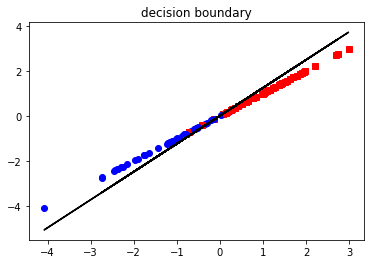

In [78]:
#--
# per1.py
# scikit-learn perceptron classification applied to a synthetic data set
# @author: letsios, sklar
# @created: 12 Jan 2021
#
#--

import sys
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as model_select
import sklearn.datasets as data

from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

DEBUGGING = True
PLOT_DIR  = '../plots/'
LEARNING_RATE = 0.0001


#--
# MAIN
#--



DEBUGGING = True
PLOT_DIR  = '../plots/'


#--
# MAIN
#--

#-generate synthetic data for classification
num_features = 1
x, y = data.make_classification( n_samples=100, n_features=num_features, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1 )

#-(optionally) print some info about the data set
if DEBUGGING:
    print( 'number of features = %d' % ( num_features ))

# set number of instances
M = len( x )
# find and scale smallest and largest values of x and y, for plot axis
# limits (so that plots displayed during iterative search have
# consistent axis limits)
xmin = 0.95 * min( x )
xmax = 1.05 * max( x )
ymin = 0.95 * min( x )
ymax = 1.05 * max( x )

#-plot raw data --- always a good idea to do this!
plt.figure()
# plot data points
for j in range( M ):
    if ( y[j] == 0 ):
        h0, = plt.plot( x[j], x[j], 'b.', markersize=10 )
    else:
        h1, = plt.plot( x[j], x[j], 'r+', markersize=10 )
plt.legend(( h0, h1 ), ( 'class0', 'class1' ))
# set plot axis limits so it all displays nicely
plt.xlim(( xmin, xmax ))
plt.ylim(( ymin, ymax ))
# add plot labels and ticks
plt.xticks( fontsize=14 )
plt.yticks( fontsize=14 )
plt.xlabel( 'x' , fontsize=14 )
plt.ylabel( 'x' , fontsize=14 )
plt.title( 'raw data', fontsize=14 )
# save plot
plt.savefig( PLOT_DIR + 'data2-raw.png' )
plt.show()
plt.close()

#-partition the data
x_train, x_test, y_train, y_test = model_select.train_test_split( x, y, test_size=0.10 )

#-plot partitioned data
plt.figure()
# plot data points
for j in range( len( x_train )):
    if ( y_train[j] == 0 ):
        h0train, = plt.plot( x_train[j], x_train[j], 'b.', markersize=10 )
    else:
        h1train, = plt.plot( x_train[j], x_train[j], 'r+', markersize=10 )
for j in range( len( x_test )):
    if ( y_test[j] == 0 ):
        h0test, = plt.plot( x_test[j], x_test[j], 'b>', markersize=10 )
    else:
        h1test, = plt.plot( x_test[j], x_test[j], 'rs', markersize=10 )
plt.legend(( h0train, h1train, h0test, h1test ), ( 'train, class0', 'train, class1', 'test, class0', 'test, class1' ))
# set plot axis limits so it all displays nicely
plt.xlim(( xmin, xmax ))
plt.ylim(( ymin, ymax ))
# add plot labels and ticks
plt.xticks( fontsize=14 )
plt.yticks( fontsize=14 )
plt.xlabel( 'x' , fontsize=14 )
plt.ylabel( 'x' , fontsize=14 )
plt.title( 'partitioned data', fontsize=14 )
# save plot
plt.savefig( PLOT_DIR + 'data2-partitioned.png' )
plt.show()
plt.close()



#-generate synthetic data set
x, y = datasets.make_classification( n_features=1, n_redundant=0, n_informative=1, n_classes=2, n_clusters_per_class=1, n_samples=100 )

# set number of instances
M = len( x )

#-plot raw data --- always a good idea to do this!
plt.figure()
#plt.hold( True )
# plot data points
for j in range( M ):
    if ( y[j] == 0 ):
        plt.plot( x[j], x[j], 'bo' )
    else:
        plt.plot( x[j], x[j], 'rs' )
plt.title( 'raw data' )
plt.ylabel( 'x' )
# save plot
plt.savefig( PLOT_DIR + 'per-raw-data.png' )
plt.show()
plt.close()


#-use scikit-learn's perceptron model
per = linear_model.Perceptron()
for r in range( 1000 ):
    x_train, x_test, y_train, y_test = model_selection.train_test_split( x, y, test_size=0.10 )
    per.fit( x_train, y_train )
    y_hat = per.predict( x_test )
print('perceptron weights:')
print('w0 = {}, w1 = {}'.format( per.intercept_, per.coef_ ))
print('accuracy = ', ( metrics.accuracy_score( y_test, y_hat )))

#-plot results
plt.figure()
#plt.hold( True )
# plot raw data points
for j in range( M ):
    if ( y[j] == 0 ):
        plt.plot( x[j], x[j], 'bo' )
    else:
        plt.plot( x[j], x[j], 'rs' )
plt.title( 'decision boundary' )
# plot boundary
[xmin,xmax] = plt.xlim()
xx = []
yy = []
for j in range( M ):
    xx.append( x[j] )
    y_ = per.intercept_ + x[j] * per.coef_[0,0]
    yy.append( y_ )
plt.plot( xx, yy, 'k-' )
# save plot
plt.savefig( PLOT_DIR + 'per-boundary.png' )
plt.show()
plt.close()
